In [4]:
 %pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from pylab import *
from scipy import *
from scipy import stats, io
import numpy as np
import struct
import tables as tb
from attrdict import AttrDict
import matplotlib.pyplot as plt
import os as os
from phy.io import KwikModel
import codecs as codecs
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick

In [96]:
#----------------------------------------------------------------------------------------
#SAVING BINARY OBJECTS DATA
#need to automate data folder creation
#----------------------------------------------------------------------------------------
import pickle 

def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Experiment Files and Folders

In [93]:
# In this cell you put all the information to make the code portable from computer to computer
# You have to place all the file names and experiments, then you loop whichever you want to analyse
#--------------------------------------------------------------------------------
#Experiment numbers
ExpeNum = [20,22,23,24,26,27,28,29,30,31,32]

#--------------------------------------------------------------------------------
#Folders for measurements and experiments (this is how we separate shanks in folders for individual analyses)
m164 = ['m1s1','m1s2','m1s3','m1s4','m1s5','m1s6','m1s7','m1s8']
m264 = ['m2s1','m2s2','m2s3','m2s4','m2s5','m2s6','m2s7','m2s8']
m364 = ['m3s1','m3s2','m3s3','m3s4','m3s5','m3s6','m3s7','m3s8']
m464 = ['m4s1','m4s2','m4s3','m4s4','m4s5','m4s6','m4s7','m4s8']

#--------------------------------------------------------------------------------
#Kwik files    

files20 = [ 'MEAS-150707-1_ele01_ele08.kwik',
            'MEAS-150707-1_ele09_ele16.kwik',
            'MEAS-150707-1_ele17_ele24.kwik',
            'MEAS-150707-1_ele25_ele32.kwik',
            'MEAS-150707-23_ele01_ele08.kwik',
            'MEAS-150707-23_ele16_ele09.kwik']#,
            #'MEAS-150707-23_ele17_ele24.kwik',  not in S2
            #'MEAS-150707-23_ele25_ele32.kwik',] not in S2

files22 = [ 'MEAS-150716-12_ele01_ele08.kwik',
            'MEAS-150716-12_ele09_ele16.kwik',
            'MEAS-150716-12_ele17_ele24.kwik',
            'MEAS-150716-12_ele25_ele32.kwik',
            'MEAS-150716-3_ele01_ele08.kwik',
            'MEAS-150716-3_ele09_ele16.kwik',
            'MEAS-150716-3_ele17_ele24.kwik',
            'MEAS-150716-3_ele25_ele32.kwik',]

files23 = [ 'MEAS-151027-1_ele01_ele08.kwik',
            'MEAS-151027-1_ele09_ele16.kwik',
            #'MEAS-151027-1_ele17_ele24.kwik', out of S2
            #'MEAS-151027-1_ele25_ele32.kwik', out of S2
            #'MEAS-151027-1_ele33_ele40.kwik', out of S2
            #'MEAS-151027-1_ele41_ele48.kwik', out of S2
            #'MEAS-151027-1_ele49_ele56.kwik', out of S2
            #'MEAS-151027-1_ele57_ele64.kwik', out of S2
            'MEAS-151027-2_ele01_ele08.kwik',
            'MEAS-151027-2_ele09_ele16.kwik',
            'MEAS-151027-2_ele17_ele24.kwik',
            'MEAS-151027-2_ele25_ele32.kwik',
            'MEAS-151027-2_ele33_ele40.kwik']#,
            #'MEAS-151027-2_ele41_ele48.kwik',  out of S2
            #'MEAS-151027-2_ele49_ele56.kwik',  out of S2
            #'MEAS-151027-2_ele57_ele64.kwik']  out of S2

files24 = [#'MEAS-151103-1_EXTRACTED_ele25_ele32.kwik',  no functional responses
           'MEAS-151103-1_EXTRACTED_ele33_ele40.kwik',  
           'MEAS-151103-1_EXTRACTED_ele41_ele48.kwik',  
           'MEAS-151103-1_EXTRACTED_ele49_ele56.kwik',  
           'MEAS-151103-1_EXTRACTED_ele57_ele64.kwik',
           #'MEAS-151103-2_ele33_ele40.kwik',   no units
           'MEAS-151103-2_ele41_ele48.kwik',
           'MEAS-151103-2_ele49_ele56.kwik',
           'MEAS-151103-2_ele57_ele64.kwik']

#OUT OF S2
#files25 = [ 'MEAS-151105-1good_ele01_ele08.kwik',
#            'MEAS-151105-1good_ele09_ele16.kwik',
#            'MEAS-151105-1good_ele17_ele24.kwik',
#            'MEAS-151105-1good_ele25_ele32.kwik',
#            'MEAS-151105-1good_ele33_ele40.kwik',
#            'MEAS-151105-1good_ele41_ele48.kwik',
#            'MEAS-151105-1good_ele49_ele56.kwik',
#            'MEAS-151105-1good_ele57_ele64.kwik',
#            'MEAS-151105-2_ele01_ele08.kwik',
#            'MEAS-151105-2_ele09_ele16.kwik',
#            'MEAS-151105-2_ele17_ele24.kwik',
#            'MEAS-151105-2_ele25_ele32.kwik',
#            'MEAS-151105-2_ele33_ele40.kwik',
#            'MEAS-151105-2_ele41_ele48.kwik',
#            'MEAS-151105-2_ele49_ele56.kwik',
#            'MEAS-151105-2_ele57_ele64.kwik']

files26 = [ 'MEAS-151110-1_ele01_ele08.kwik',
            'MEAS-151110-1_ele09_ele16.kwik',
            'MEAS-151110-1_ele17_ele24.kwik',
            'MEAS-151110-1_ele25_ele32.kwik',
            'MEAS-151110-1_ele33_ele40.kwik',
            'MEAS-151110-1_ele41_ele48.kwik',
            'MEAS-151110-1_ele49_ele56.kwik',
            #'MEAS-151110-1_ele57_ele64.kwik', out of S2
            'MEAS-151110-2_ele01_ele08.kwik',
            'MEAS-151110-2_ele09_ele16.kwik',
            'MEAS-151110-2_ele17_ele24.kwik',
            'MEAS-151110-2_ele25_ele32.kwik']#,
            #'MEAS-151110-2_ele33_ele40.kwik',  no units
            #'MEAS-151110-2_ele41_ele48.kwik', out of S2
            #'MEAS-151110-2_ele49_ele56.kwik', no units
            #'MEAS-151110-2_ele57_ele64.kwik', no units
            #'MEAS-151110-3_ele01_ele08.kwik',  out of S2
            #'MEAS-151110-3_ele09_ele16.kwik',  out of S2
            #'MEAS-151110-3_ele17_ele24.kwik',  out of S2
            #'MEAS-151110-3_ele25_ele32.kwik',  out of S2
            #'MEAS-151110-3_ele33_ele40.kwik',  out of S2
            #'MEAS-151110-3_ele41_ele48.kwik',  out of S2
            #'MEAS-151110-3_ele49_ele56.kwik',  no units
            #'MEAS-151110-3_ele57_ele64.kwik']  no units

files27  = ['MEAS-151112-1_ele01_ele08.kwik',
            'MEAS-151112-1_ele09_ele16.kwik',
            'MEAS-151112-1_ele17_ele24.kwik',
            'MEAS-151112-1_ele25_ele32.kwik',
            'MEAS-151112-1_ele33_ele40.kwik',
            'MEAS-151112-1_ele41_ele48.kwik',
            'MEAS-151112-1_ele49_ele56.kwik',
            'MEAS-151112-1_ele57_ele64.kwik',
            'MEAS-151112-2_ele01_ele08.kwik',
            'MEAS-151112-2_ele09_ele16.kwik',
            'MEAS-151112-2_ele17_ele24.kwik',
            'MEAS-151112-2_ele25_ele32.kwik',
            'MEAS-151112-2_ele33_ele40.kwik',
            'MEAS-151112-2_ele41_ele48.kwik',
            'MEAS-151112-2_ele49_ele56.kwik',
            'MEAS-151112-2_ele57_ele64.kwik',
            'MEAS-151112-3_ele01_ele08.kwik',
            'MEAS-151112-3_ele09_ele16.kwik',
            'MEAS-151112-3_ele17_ele24.kwik',
            'MEAS-151112-3_ele25_ele32.kwik',
            'MEAS-151112-3_ele33_ele40.kwik',
            'MEAS-151112-3_ele41_ele48.kwik',
            'MEAS-151112-3_ele49_ele56.kwik',
            'MEAS-151112-3_ele57_ele64.kwik']

files28 =  ['MEAS-151116-1_ele01_ele08.kwik',
            'MEAS-151116-1_ele09_ele16.kwik',
            'MEAS-151116-1_ele17_ele24.kwik',
            'MEAS-151116-1_ele25_ele32.kwik',
            'MEAS-151116-1_ele33_ele40.kwik',
            'MEAS-151116-1_ele41_ele48.kwik',
            'MEAS-151116-1_ele49_ele56.kwik',
            #'MEAS-151116-1_ele57_ele64.kwik',
            'MEAS-151116-2_ele01_ele08.kwik',
            'MEAS-151116-2_ele09_ele16.kwik',
            'MEAS-151116-2_ele17_ele24.kwik',
            'MEAS-151116-2_ele25_ele32.kwik',
            'MEAS-151116-2_ele33_ele40.kwik',
            'MEAS-151116-2_ele41_ele48.kwik',
            'MEAS-151116-2_ele49_ele56.kwik',
            'MEAS-151116-2_ele57_ele64.kwik',
            'MEAS-151116-3_ele01_ele08.kwik',
            'MEAS-151116-3_ele09_ele16.kwik',
            'MEAS-151116-3_ele17_ele24.kwik',
            'MEAS-151116-3_ele25_ele32.kwik',
            'MEAS-151116-3_ele33_ele40.kwik',
            'MEAS-151116-3_ele41_ele48.kwik',
            'MEAS-151116-3_ele49_ele56.kwik',
            'MEAS-151116-3_ele57_ele64.kwik']

files29  = ['MEAS-151118-1_ele01_ele08.kwik',
            'MEAS-151118-1_ele09_ele16.kwik',
            'MEAS-151118-1_ele17_ele24.kwik',
            'MEAS-151118-1_ele25_ele32.kwik',
            'MEAS-151118-1_ele33_ele40.kwik',
            'MEAS-151118-1_ele41_ele48.kwik',
            'MEAS-151118-1_ele49_ele56.kwik',
            'MEAS-151118-1_ele57_ele64.kwik',
            'MEAS-151118-2_ele01_ele08.kwik',
            'MEAS-151118-2_ele09_ele16.kwik',
            'MEAS-151118-2_ele17_ele24.kwik',
            'MEAS-151118-2_ele25_ele32.kwik',
            'MEAS-151118-2_ele33_ele40.kwik',
            'MEAS-151118-2_ele41_ele48.kwik',
            'MEAS-151118-2_ele49_ele56.kwik',
            'MEAS-151118-2_ele57_ele64.kwik',
            'MEAS-151118-3_ele01_ele08.kwik',
            'MEAS-151118-3_ele09_ele16.kwik',
            'MEAS-151118-3_ele17_ele24.kwik',
            'MEAS-151118-3_ele25_ele32.kwik',
            'MEAS-151118-3_ele33_ele40.kwik',
            'MEAS-151118-3_ele41_ele48.kwik',
            'MEAS-151118-3_ele49_ele56.kwik',
            'MEAS-151118-3_ele57_ele64.kwik']


files30  = ['MEAS-151208-2_ele01_ele08.kwik',
            'MEAS-151208-2_ele09_ele16.kwik',
            'MEAS-151208-2_ele17_ele24.kwik',
            'MEAS-151208-2_ele25_ele32.kwik',
            'MEAS-151208-2_ele33_ele40.kwik',
            'MEAS-151208-2_ele41_ele48.kwik',
            'MEAS-151208-2_ele49_ele56.kwik',
            'MEAS-151208-2_ele57_ele64.kwik',
            'MEAS-151208-3_ele01_ele08.kwik',
            'MEAS-151208-3_ele09_ele16.kwik',
            'MEAS-151208-3_ele17_ele24.kwik',
            'MEAS-151208-3_ele25_ele32.kwik',
            'MEAS-151208-3_ele33_ele40.kwik',
            'MEAS-151208-3_ele41_ele48.kwik',
            'MEAS-151208-3_ele49_ele56.kwik',
            'MEAS-151208-3_ele57_ele64.kwik',
            'MEAS-151208-4_ele01_ele08.kwik',
            'MEAS-151208-4_ele09_ele16.kwik',
            'MEAS-151208-4_ele17_ele24.kwik',
            'MEAS-151208-4_ele25_ele32.kwik',
            'MEAS-151208-4_ele33_ele40.kwik',
            'MEAS-151208-4_ele41_ele48.kwik',
            'MEAS-151208-4_ele49_ele56.kwik',
            'MEAS-151208-4_ele57_ele64.kwik',
            'MEAS-151208-5_ele01_ele08.kwik',
            'MEAS-151208-5_ele09_ele16.kwik',
            'MEAS-151208-5_ele17_ele24.kwik',
            'MEAS-151208-5_ele25_ele32.kwik',
            'MEAS-151208-5_ele33_ele40.kwik',
            'MEAS-151208-5_ele41_ele48.kwik',
            'MEAS-151208-5_ele49_ele56.kwik',
            'MEAS-151208-5_ele57_ele64.kwik']


files31 = [ #'MEAS-151210-1_ele01_ele08.kwik',  no units
            #'MEAS-151210-1_ele09_ele16.kwik',  no units
            #'MEAS-151210-1_ele17_ele24.kwik',  no units
            #'MEAS-151210-1_ele25_ele32.kwik',  no units
            #'MEAS-151210-1_ele33_ele40.kwik',  no units
            'MEAS-151210-1_ele41_ele48.kwik',
            'MEAS-151210-1_ele49_ele56.kwik',
            'MEAS-151210-1_ele57_ele64.kwik',
            #'MEAS-151210-2_ele01_ele08.kwik',   out of S2
            #'MEAS-151210-2_ele09_ele16.kwik',   out of S2
            #'MEAS-151210-2_ele17_ele24.kwik',   out of S2
            #'MEAS-151210-2_ele25_ele32.kwik',   out of S2
            'MEAS-151210-2_ele33_ele40.kwik',
            'MEAS-151210-2_ele41_ele48.kwik',
            'MEAS-151210-2_ele49_ele56.kwik',
            'MEAS-151210-2_ele57_ele64.kwik',
            #'MEAS-151210-3_ele01_ele08.kwik',   out of S2
            #'MEAS-151210-3_ele09_ele16.kwik',   no units
            #'MEAS-151210-3_ele17_ele24.kwik',   no units
            #'MEAS-151210-3_ele25_ele32.kwik',   out of S2
            'MEAS-151210-3_ele33_ele40.kwik',
            'MEAS-151210-3_ele41_ele48.kwik',
            'MEAS-151210-3_ele49_ele56.kwik',
            'MEAS-151210-3_ele57_ele64.kwik']

files32 = [ 'MEAS-151214-1_ele01_ele08.kwik',
            'MEAS-151214-1_ele09_ele16.kwik',
            'MEAS-151214-1_ele17_ele24.kwik',
            'MEAS-151214-1_ele25_ele32.kwik',
            'MEAS-151214-1_ele33_ele40.kwik',
            'MEAS-151214-2_ele01_ele08.kwik',
            'MEAS-151214-2_ele09_ele16.kwik',
            'MEAS-151214-2_ele17_ele24.kwik',
            'MEAS-151214-2_ele25_ele32.kwik',
            'MEAS-151214-2_ele33_ele40.kwik']

#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
# Here I create my dictionary of experiments
Expe={}
for num in ExpeNum: 
    Expe[num] = dict()
#---------------------------------------
i=0        
for meas in np.append(m164[0:4],m364[0:2]):
    Expe[20][meas] = files20[i]
    i+=1
#---------------------------------------
i=0 
for meas in np.append(m164[0:4],m364[0:4]):
    Expe[22][meas] = files22[i]
    i+=1
#---------------------------------------
i=0 
for meas in np.append(m164[0:2],m264[0:5]):
    Expe[23][meas] = files23[i]
    i+=1
#---------------------------------------
i=0
for meas in np.append(m164[4:8],m264[5:8]):    
    Expe[24][meas] = files24[i]
    i+=1
#---------------------------------------
#i=0 
#for meas in np.append(m164,m264):    
#    Expe[25][meas] = files25[i]
#    i+=1
#---------------------------------------
i=0
for meas in np.append(m164[0:7],m264[0:4]):
    Expe[26][meas] = files26[i]
    i+=1
#---------------------------------------
i=0
for meas in np.append(np.append(m164[0:7],m264),m364):    
    Expe[28][meas] = files28[i]
    i+=1
#---------------------------------------    
i=0
for meas in np.append(np.append(m164,m264),m364):    
    Expe[27][meas] = files27[i]
    Expe[29][meas] = files29[i]
    Expe[30][meas] = files30[i]
    i+=1
#---------------------------------------    
for meas in m464:
    Expe[30][meas] = files30[i]
    i+=1
i=0
#---------------------------------------    
i=0
for meas in np.append(np.append(m164[5:8],m264[4:8]),m364[4:8]):    
    Expe[31][meas] = files31[i]
    i+=1
i=0
#---------------------------------------    
for meas in np.append(m164[0:5],m264[0:5]):
    Expe[32][meas] = files32[i]
    i+=1

#--------------------------------------------------------------------------------
#Initialize wave features dictionary
Wavedata = dict()


#--------------------------------------------------------------------------------
#Root folder to work in, such all will be in subfolders 
fileswaves={}

FolderWaves = '/home/matias/WORKSPACE/S2_git/'    
for i in ExpeNum:
    fileswaves[i] = 'wavedata' + str(i)

# DISPLAYING FUNCTIONS

In [177]:
#----------------------------------------------------------------------------------------
# DISPLAY PSTH 
#----------------------------------------------------------------------------------------
# Plot a single neuron PSTH, 25 piezos
def display_waves(expe,wavedata,fig,inner_grid,neuron) :
    
                
    fig2 = figure()
    ax = fig2.add_subplot(1,1,1)
        
    electrodes = [0,7,1,6,2,5,3,4]
    eleclinear = [2,6,1,5,3,7,0,4]
    #[2,1,3,0,4,7,5,6]
    #---------------------------------
    
    buzsaki= True
    if int(expe)==20: buzsaki = False
    
    if buzsaki:
        elec = electrodes
    else:
        elec = eleclinear
    #---------------------------------
    i=0
    origin=0
    
    for i in range(8) :
        if i==0:
            #ax1 = subplot(5,5,1, frame_on=False)
            ax1 = Subplot(fig, inner_grid[i])     
            ax1.set_xticks([])
            #ax1.set_yticks([])
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            #ax1.spines['left'].set_visible(False)
            ax1.spines['bottom'].set_visible(False)
            ax1.set_yticklabels([])
        else :
            #subplot(5,5,i+1,sharex=ax1,sharey=ax1,frame_on=False)
            ax1 = Subplot(fig,inner_grid[i],sharex=ax1,sharey=ax1)
            ax1.set_xticks([])
            #ax1.set_yticks([])
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            #ax1.spines['left'].set_visible(False)
            ax1.spines['bottom'].set_visible(False)
            ax1.set_yticklabels([])
    
    
        ax.set_aspect(1)
    
        m =wavedata.meanwave[:,elec[i]]
        s =wavedata.stdwave[:,elec[i]]
            
        #m=m-m[0]
        step=100
        if buzsaki:
            if i%2==1:
                m=m-step
                origin = (-step)
            else: 
                m=m+step
                origin =step

        if m.size :
            ax1.plot(arange(48),m,color='red')

            #ax1.plot(arange(48),origin+0*arange(48),color='k')
            ax1.plot(arange(48),m+s,color='gray')
            ax1.plot(arange(48),m-s,color='gray')     

        ax1.axhline(origin, color = 'k', linewidth=1)
        
        ax1.set_xlim([0, 47])
        ax1.set_ylim([-600, 400])
            
        if i ==0: ax1.set_title('                Nrn' + str(neuron[12:]) ,fontsize=9)
                                                 
        fig.add_subplot(ax1)

#----------------------------------------------------------------------------------------
def display_all_Waves_of_recording(expe,wavedata,neuron_list,counts,pdf_files_directory,grupete,titles) :
    
    fig = plt.figure(figsize=(12,16.5))
    nrns = counts
    if nrns <32: 
        layout = [5,6]
    else: layout = [nrns//6+(nrns%6!=0),6]
    outer_grid = gridspec.GridSpec(layout[0], layout[1], wspace=0.2, hspace=0.2)
    
    ii=0
       
    orderneurons = neuron_list #np.sort(list(histdata.keys()))
    for neuron in  orderneurons:
        
        clf()
                    
        inner_grid = gridspec.GridSpecFromSubplotSpec(4,2,subplot_spec=outer_grid[ii], wspace=0.1, hspace=0.1)
               
        display_waves(expe,wavedata[neuron],fig,inner_grid,neuron)                               
        
        fig.suptitle(titles + '_WaveMeans' ,fontsize=16)
        
        ii+=1
        
        fig.savefig(pdf_files_directory + titles + '_waveforms.pdf', format='pdf')
        
    clf()



# Define and load data files from experiments

20
   loading waves
group: 2
m1s1
   #clusters:  1
   plotting
m1s2
   #clusters:  0
   plotting
m1s3
   #clusters:  2
   plotting
m1s4
   #clusters:  5
   plotting
m3s1
   #clusters:  0
   plotting
m3s2
   #clusters:  3
   plotting


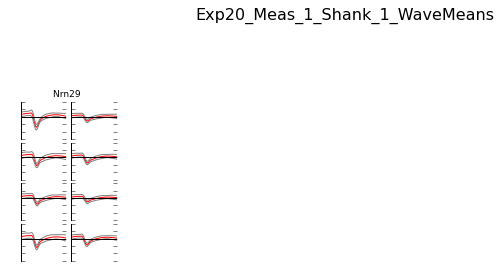

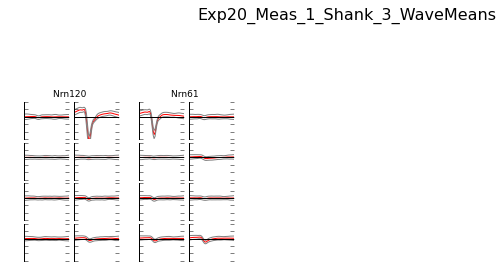

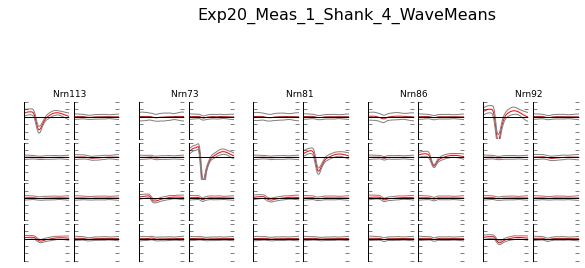

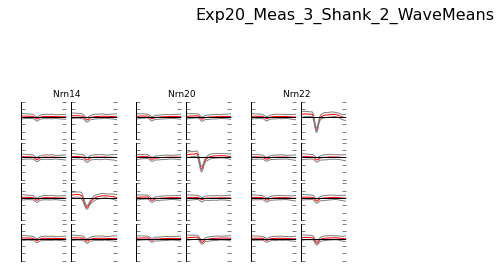

In [176]:
global binname, textname
#---------------------------------------------------------------------------------------
SelExp = [20]   #Expe                                        #select experiment numbers!
grupete = [2]   #select cluster groups! 2 for good clusters 1 for multiunits, 3 for unsorted

#select measurement and/or shanks!
Measurements = m364[0:2]           #['m1s1']#['m3s1','m3s3']#m12[-4:]#['m1s1','m1s2','m1s3','m1s4']   

# choice code not to ploteverything at the same time
ploteo = [0,0,0,0]                                           #1 to make plots: psth,sta,ufc,stc

dirs =[]

#--------------------------------------------------------------------------------
# Loop Experiments
#--------------------------------------------------------------------------------
last_exp=0     #we use this to load stim only when we change experiment
for expe in SelExp:
    #uncomment if we want a whole file for all the experiments
    Wavedata = dict()
    
    Measurements = sorted(Expe[expe])                         #uncommento to select all
    print(expe)
    
    #load datafile
    print('   loading waves')
    #------------------------------------------------
    data = Folder +'/'+ fileswaves[expe]    
    Wavedata.update(load_obj(data))

    #--------------------------------------------------------------------------------
    #loop goodunits
    for group in grupete:   #2 for good clusters 1 for multiunits 3 for unsorted
        #folder names
        if group ==2:
            dirs  = [rootF + 'OUTPUT/PDFwaves/EXP_'+str(expe)]
        print('group:', group)
        #--------------------------------------------------------------------------------
        #loop measurements and shanks
        measurements = Expe[expe]                            
                 
        for meas in Measurements:           
            print(meas)
            
            idx = []
            neuron_list = []
            count_meas =0
            #---------------------------------------------------------------
            #Count number of clusters within this measurement and shank
            idx = sorted(list(Wavedata.keys()))
            
            for cluster in idx:
                if Wavedata[cluster].meas == int(meas[1]) and Wavedata[cluster].exp ==expe and Wavedata[cluster].shank == int(meas[3]):
                    neuron_list = np.append(neuron_list, cluster)
                    count_meas+=1
            
            print('   #clusters: ',count_meas)
            #---------------------------------------------------------------
            #load stimulus if looping new experiment, without trimming
           
            if len(Wavedata.keys())>0:                              #do only if there are clusters
                #--------------------------------------------------------------------------------
                #create output folders
                for dir in dirs:
                    if not os.path.exists(dir):
                        os.makedirs(dir) 
                dire = dirs[0] +'/'
                titles = 'Exp'+ str(expe) + '_Meas_' + meas[1] + '_Shank_' + meas[3]
                #--------------------------------------------------------------------------------
                #Plot Waves
                print('   plotting')
                display_all_Waves_of_recording(expe,Wavedata,neuron_list,count_meas,dire,grupete,titles)                   
         
   

In [191]:
a = dict()

a.update(load_obj('/home/matias/WORKSPACE/S2_git/data/wavedata20'))
         



a.update(load_obj('/home/matias/WORKSPACE/S2_git/data/wavedata22'))


k = sorted(list(a.keys()    ))


a[k[0]].keys()


dict_keys(['params', 'electrodemax', 'meas', 'bigwave', 'bigwavestd', 'meanwave', 'exp', 'parnames', 'stdwave', 'waves', 'shank'])

In [170]:
np.ones(10)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [100]:
titles


'Exp20_Meas_3_Shank_2'

In [78]:
Wavedata[cluster].shan



True

In [ ]:
    filesave ='wavedata' + str(expe)
    save_obj(Wavedata,filesave)
    
    >>> x = {'a':1, 'b': 2}
>>> y = {'b':10, 'c': 11}
>>> z = x.update(y)
>>> print z
None
>>> x
{'a': 1, 'b': 10, 'c': 11}

In [2]:




idx = list(sorted(Wavedata.keys()))
idx[0]

print('keys: ',Wavedata[idx[0]].keys())

print('parnames: ',Wavedata[idx[0]].params_names)

print('firstidx: ' ,idx[0])

print('number of idx: ',len(idx))

print('params: ',Wavedata[idx[0]].params)

print(Wavedata.keys())

neuron=0

electrode = Wavedata[idx[neuron]].electrodemax

plot(Wavedata[idx[neuron]].bigwave)
plot(Wavedata[idx[neuron]].bigwave+Wavedata[idx[neuron]].bigwavestd)
plot(Wavedata[idx[neuron]].bigwave-Wavedata[idx[neuron]].bigwavestd)

wave0 = Wavedata[idx[0]]

wave0.bigwave

#print(wave0.waves.shape)

wave0.params

print(idx)

IndexError: list index out of range

In [ ]:
save_obj(Wavedata,'wavedata220')

neuron='12'



In [ ]:
Wavedata = load_obj('wavedata20')




In [ ]:
idx = sort(list(Wavedata.keys()))

print(Wavedata[idx[0]].keys())

Wavedata[idx[0]].params_names

Wavedata.keys()

exp22_m1s2_c17


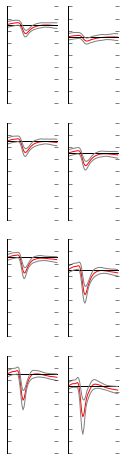

In [43]:
#Plotting waveforms

import pickle 

def save_obj(obj, name ):
    with open('data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)


Wavedata = dict()

files = ['wavedata20','wavedata22','wavedata23','wavedata24','wavedata26','wavedata27','wavedata28','wavedata29','wavedata30','wavedata31','wavedata32']


Folder = '/home/matias/WORKSPACE/S2_git/data'    
#------------------------------------------------

for file in files[1:2]:
	data = Folder +'/'+ file    
	Wavedata.update(load_obj(data))
    
idx = sort(list(Wavedata.keys()))

neuron = idx[0]

print(neuron)

fig = figure(figsize=(2,8))

pos2 = arange(1,9)

electrodes = [0,7,1,6,2,5,3,4]
eleclinear = [2,1,3,0,4,7,5,6]

buzsaki= True
if buzsaki:
    elec = electrodes
else:
    elec = eleclinear

i=0
origin=0
for i in arange(8):
    
    ax1 = fig.add_subplot(4,2,pos2[i])
    
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    #ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
   
    ax1.set_xlim([0, 48])
    ax1.set_ylim([-1200, 400])
    
    #for x in arange(Spikes[neuron]['spike_times'].shape[0]):
    #    ax1.plot(arange(48),wave[neuron]['waves'][x,:,elec[i]],color='b')

    m =Wavedata[neuron].meanwave[:,elec[i]]
    s =Wavedata[neuron].stdwave[:,elec[i]]
    
    m=m-m[0]
    
    #sem= stats.sem (Waves[neuron]['waves'][:,:,elec[i]],axis=0)
    step=100
    if buzsaki:
        if i%2==1:
            m=m-step
            origin =-step
        else: 
            m=m+step
            origin =step
    
    ax1.plot(arange(48),m,color='red')
    
    ax1.plot(arange(48),origin+0*arange(48),color='k')
    ax1.plot(arange(48),m+s,color='gray')
    ax1.plot(arange(48),m-s,color='gray')     
    
    ax1.set_xticks([])
    ax1.set_yticklabels([])
      
#print(Waves[21656]['waves'][100,:,0])
#print(Waves[21656]['waves'].shape)
#Spikes[21656]['spike_times'].shape